<a href="https://colab.research.google.com/github/SachinVermaDTU/learn/blob/master/Depression%20detection%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Detection in Tweets

# 1. Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import shap
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 2. Loading the Data

In [ ]:

data = pd.read_csv('sentiment_tweets3.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(20)

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, d...",0
7,23 or 24ï¿½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


In [ ]:
data['label'].value_counts()

,count
label,
0,8000
1,2314


In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# 3. Text Preprocessing Functions

In [ ]:

def clean_text(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Lowercase and trim spaces
    return text

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def stem_text(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# 4. Applying Preprocessing Steps

In [ ]:

def preprocess_text(text):
    cleaned = clean_text(text)
    tokens = tokenize_text(cleaned)
    no_stopwords = remove_stopwords(tokens)
    stemmed = stem_text(no_stopwords)
    lemmatized = lemmatize_text(stemmed)
    return ' '.join(lemmatized)

data['message'] = data['message'].apply(preprocess_text)

In [ ]:
 # Download the missing punkt_tab data

# 5. WordCloud Visualization

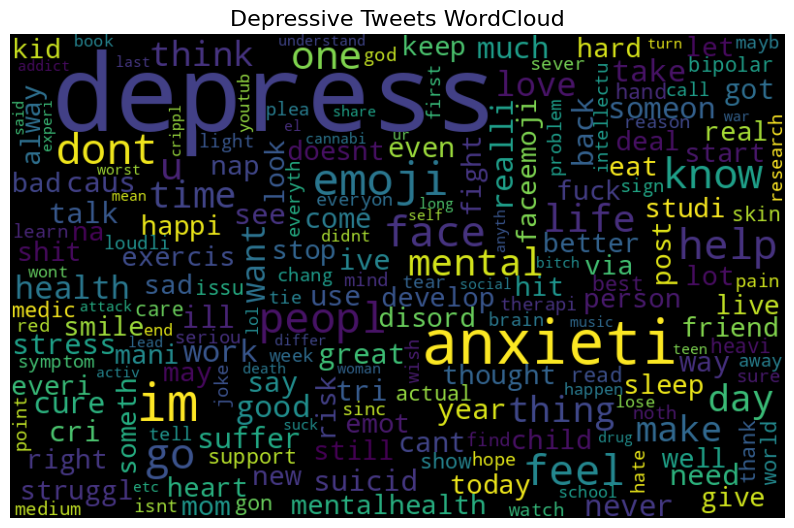

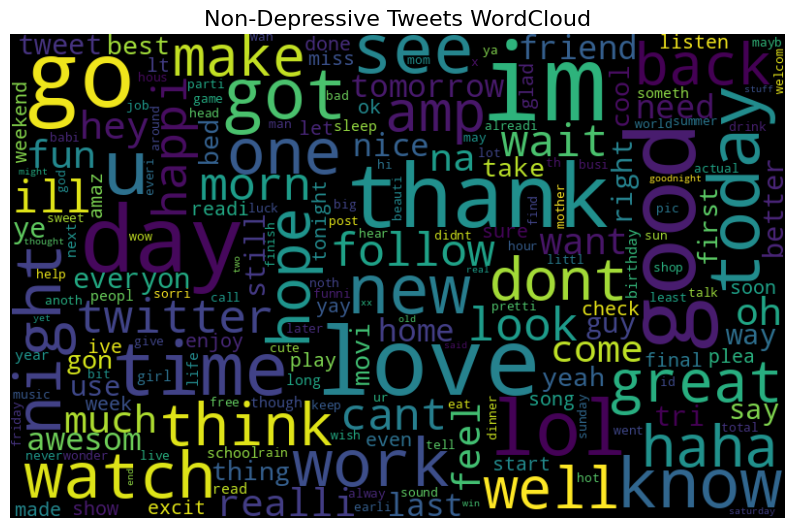

In [ ]:

def plot_wordcloud(data, label, title):
    words = ' '.join(data[data['label'] == label]['message'])
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(data, 1, "Depressive Tweets WordCloud")
plot_wordcloud(data, 0, "Non-Depressive Tweets WordCloud")

# 6. Splitting Data

In [ ]:

X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Text Vectorization (TF-IDF)
# TF-IDF converts text data into numerical features for model input.

In [ ]:

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 8. Model Training and Evaluation Function

In [ ]:

def evaluate_model(model, model_name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    return model_name, accuracy, precision, recall, f1

# 9. Comparing Models
# Training and evaluating multiple models for comparison.


Naive Bayes Results:
Accuracy: 0.9346
Precision: 0.9876
Recall: 0.7082
F1 Score: 0.8249


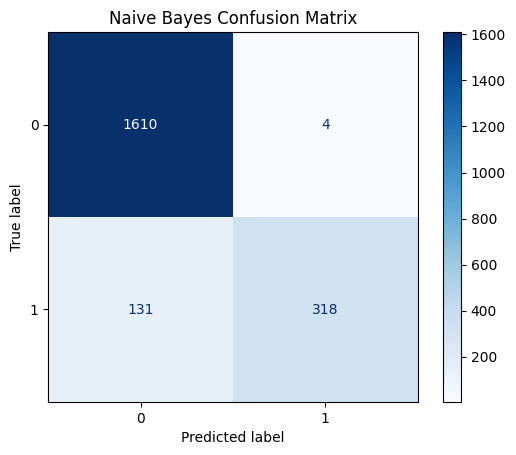


Logistic Regression Results:
Accuracy: 0.9850
Precision: 1.0000
Recall: 0.9310
F1 Score: 0.9642


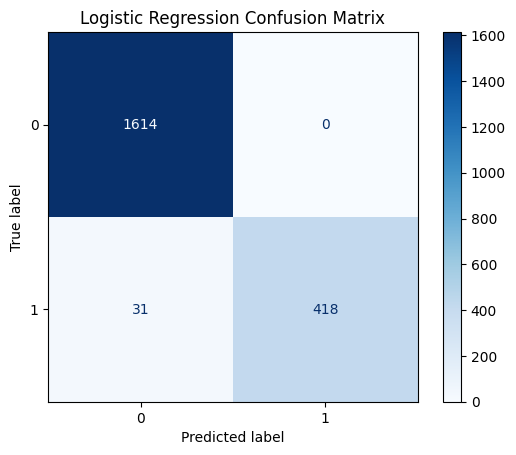


Support Vector Machine (SVM) Results:
Accuracy: 0.9922
Precision: 0.9977
Recall: 0.9666
F1 Score: 0.9819


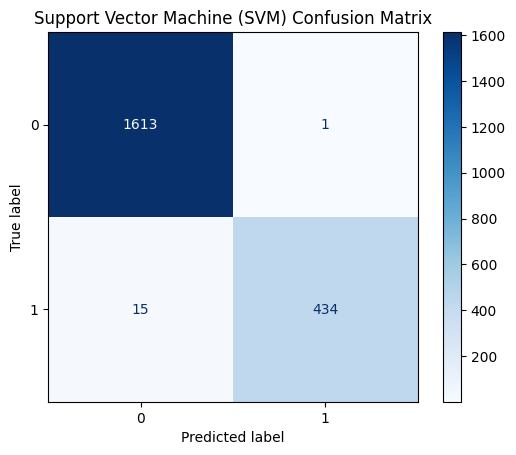

In [ ]:

evaluation_results = []
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear')

models = [(nb_model, "Naive Bayes"), (lr_model, "Logistic Regression"), (svm_model, "Support Vector Machine (SVM)")]
for model, name in models:
    evaluation_results.append(evaluate_model(model, name))

# Selecting Best Model

In [ ]:

best_model_name, best_accuracy, best_precision, best_recall, best_f1 = max(evaluation_results, key=lambda x: x[4])
print(f"\nBest Model Based on metrics: {best_model_name}")


Best Model Based on metrics: Support Vector Machine (SVM)


# 9. Model Explainability Using SHAP
# Explaining predictions using SHAP for the best model

In [ ]:

best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)
explainer = shap.Explainer(best_model, X_train_tfidf)
shap_values = explainer(X_test_tfidf)

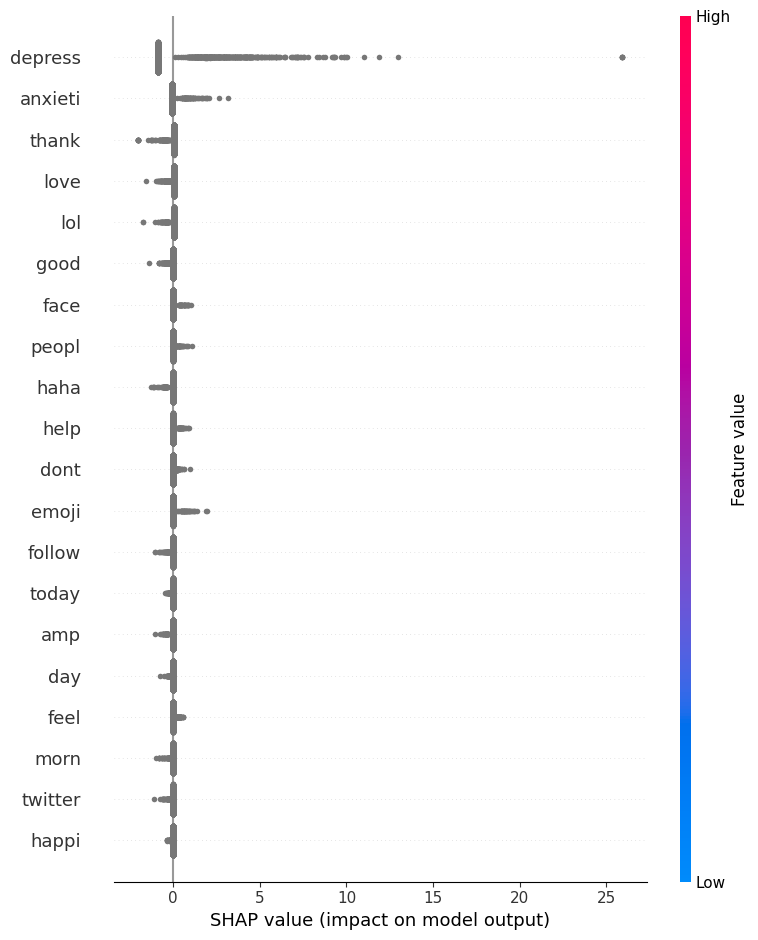

In [ ]:
# Visualizing SHAP values for a sample of predictions
shap.summary_plot(shap_values, X_test_tfidf, feature_names=vectorizer.get_feature_names_out())

In [ ]:
# New Message Prediction
def predict_new_messages_all_models(messages):
    preprocessed_messages = [preprocess_text(msg) for msg in messages]
    message_tfidf = vectorizer.transform(preprocessed_messages)

    for model, name in models:
        predictions = model.predict(message_tfidf)
        print(f"\nModel: {name}")
        for msg, label in zip(messages, predictions):
            result = "Depressive" if label == 1 else "Non-Depressive"
            print(f"Message: {msg}\nPrediction: {result}\n")


In [ ]:
new_messages = ["I feel so depressed today.", "Life is wonderful and full of joy!","i am suicidal today"]
predict_new_messages_all_models(new_messages)


Model: Naive Bayes
Message: I feel so depressed today.
Prediction: Depressive

Message: Life is wonderful and full of joy!
Prediction: Non-Depressive

Message: i am suicidal today
Prediction: Depressive


Model: Logistic Regression
Message: I feel so depressed today.
Prediction: Depressive

Message: Life is wonderful and full of joy!
Prediction: Non-Depressive

Message: i am suicidal today
Prediction: Non-Depressive


Model: Support Vector Machine (SVM)
Message: I feel so depressed today.
Prediction: Depressive

Message: Life is wonderful and full of joy!
Prediction: Non-Depressive

Message: i am suicidal today
Prediction: Non-Depressive

